<a href="https://colab.research.google.com/github/Aakash1822/Time-Series-Forecast-NSE/blob/master/Nsepy__Part_1_And_Part_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd
from pandas import datetime

In [0]:
import matplotlib
import matplotlib.pyplot as plt

In [0]:
import seaborn as sns

In [0]:
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 10,10

In [0]:
TCS = pd.read_csv('tcs_stock.csv', parse_dates=['Date'])

INFY = pd.read_csv('infy_stock.csv', parse_dates=['Date'])

NIFTY = pd.read_csv('nifty_it_index.csv', parse_dates=['Date'])


In [0]:
stock = [TCS, INFY, NIFTY]

TCS.name = 'TCS'
INFY.name = 'INFY'
NIFTY.name = 'NIFTY_IT'

In [0]:

TCS["Date"] = pd.to_datetime(TCS["Date"])
INFY["Date"] = pd.to_datetime(INFY["Date"])
NIFTY["Date"] = pd.to_datetime(NIFTY["Date"])

In [8]:
TCS.head(5)

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2016-01-01,TCS,EQ,2436.85,2439.00,2439.00,2412.25,2414.10,2416.40,2423.73,356131,8.631649e+13,15545,246115,0.6911
1,2016-01-04,TCS,EQ,2416.40,2410.15,2414.00,2366.05,2373.00,2369.60,2381.76,935092,2.227161e+14,72341,615009,0.6577
2,2016-01-05,TCS,EQ,2369.60,2385.00,2386.60,2341.00,2349.85,2348.95,2353.54,1339010,3.151409e+14,97799,1037513,0.7748
3,2016-01-06,TCS,EQ,2348.95,2350.20,2386.15,2350.20,2382.00,2381.60,2374.18,1326614,3.149627e+14,43208,852411,0.6425
4,2016-01-07,TCS,EQ,2381.60,2370.00,2382.90,2360.00,2379.00,2371.25,2367.71,1599790,3.787837e+14,29836,877850,0.5487


In [9]:
INFY.head(5)

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2016-01-01,INFY,EQ,1105.40,1100.00,1108.95,1093.20,1103.00,1105.25,1103.13,903275,9.964333e+13,18982,331554,0.3671
1,2016-01-04,INFY,EQ,1105.25,1099.95,1102.45,1076.05,1078.50,1078.90,1087.82,1987681,2.162231e+14,53877,1247329,0.6275
2,2016-01-05,INFY,EQ,1078.90,1085.50,1085.50,1062.25,1073.00,1074.05,1073.17,2474893,2.655975e+14,62085,1566206,0.6328
3,2016-01-06,INFY,EQ,1074.05,1074.65,1074.65,1058.90,1068.50,1069.35,1067.55,2794164,2.982910e+14,76128,1985200,0.7105
4,2016-01-07,INFY,EQ,1069.35,1060.05,1067.90,1047.90,1052.55,1050.80,1057.50,2647044,2.799256e+14,79845,1650344,0.6235


In [10]:
NIFTY.head(5)

,Date,Open,High,Low,Close,Volume,Turnover
0,2016-01-01,11210.25,11221.60,11137.85,11174.85,3126850,3.190300e+09
1,2016-01-04,11144.00,11160.95,11004.65,11029.25,7875357,7.677800e+09
2,2016-01-05,11082.60,11084.60,10945.20,10997.15,7909892,8.598800e+09
3,2016-01-06,11027.55,11037.40,10979.45,11018.15,8585557,9.187500e+09
4,2016-01-07,10947.75,10964.65,10822.70,10863.20,10454519,1.066610e+10


In [0]:
weeks = [4, 16, 28, 40, 52]

In [0]:

def indexing(stock):
    stock.index = stock['Date']
    return stock

In [13]:
indexing(TCS)
indexing(INFY)
indexing(NIFTY)

,Date,Open,High,Low,Close,Volume,Turnover
Date,,,,,,,
2016-01-01,2016-01-01,11210.25,11221.60,11137.85,11174.85,3126850,3.190300e+09
2016-01-04,2016-01-04,11144.00,11160.95,11004.65,11029.25,7875357,7.677800e+09
2016-01-05,2016-01-05,11082.60,11084.60,10945.20,10997.15,7909892,8.598800e+09
2016-01-06,2016-01-06,11027.55,11037.40,10979.45,11018.15,8585557,9.187500e+09
2016-01-07,2016-01-07,10947.75,10964.65,10822.70,10863.20,10454519,1.066610e+10
2016-01-08,2016-01-08,10933.30,11007.50,10896.45,10989.55,7287266,7.345900e+09
2016-01-11,2016-01-11,10898.80,10917.45,10797.70,10823.90,9742884,1.008700e+10
2016-01-12,2016-01-12,10850.25,10850.25,10659.25,10790.35,9984443,1.085980e+10
2016-01-13,2016-01-13,10807.85,10860.40,10646.55,10839.85,11133904,1.322310e+10


In [0]:
def time_series(stock, weeks = [4, 16, 28, 40, 52]):
  window = pd.DataFrame()
  window['Close'] = stock['Close'].resample('W').mean() 
  
  for x in range (len(weeks)):
    series = window['Close'].rolling(weeks[x]).mean()
    window[" Average are " + str(weeks[x])+ " Weeks"] = series
    print('Calculated Moving Averages are: for {0} weeks: \n\n {1}' 
                               .format(weeks[x], window['Close']))
  window.plot(title="Moving Averages for {} \n\n" .format(stock.name))

Calculated Moving Averages are: for 4 weeks: 

 Date
2016-01-03    2416.400000
2016-01-10    2373.800000
2016-01-17    2301.700000
2016-01-24    2277.460000
2016-01-31    2336.725000
2016-02-07    2411.820000
2016-02-14    2267.540000
2016-02-21    2289.150000
2016-02-28    2242.840000
2016-03-06    2300.600000
2016-03-13    2356.275000
2016-03-20    2357.970000
2016-03-27    2464.383333
2016-04-03    2481.300000
2016-04-10    2463.750000
2016-04-17    2517.000000
2016-04-24    2452.887500
2016-05-01    2503.080000
2016-05-08    2485.300000
2016-05-15    2528.670000
2016-05-22    2551.740000
2016-05-29    2521.390000
2016-06-05    2623.810000
2016-06-12    2597.950000
2016-06-19    2559.920000
2016-06-26    2639.490000
2016-07-03    2503.330000
2016-07-10    2458.975000
2016-07-17    2477.890000
2016-07-24    2483.150000
2016-07-31    2585.530000
2016-08-07    2672.970000
2016-08-14    2684.690000
2016-08-21    2639.575000
2016-08-28    2559.560000
2016-09-04    2515.660000
2016-09-11 

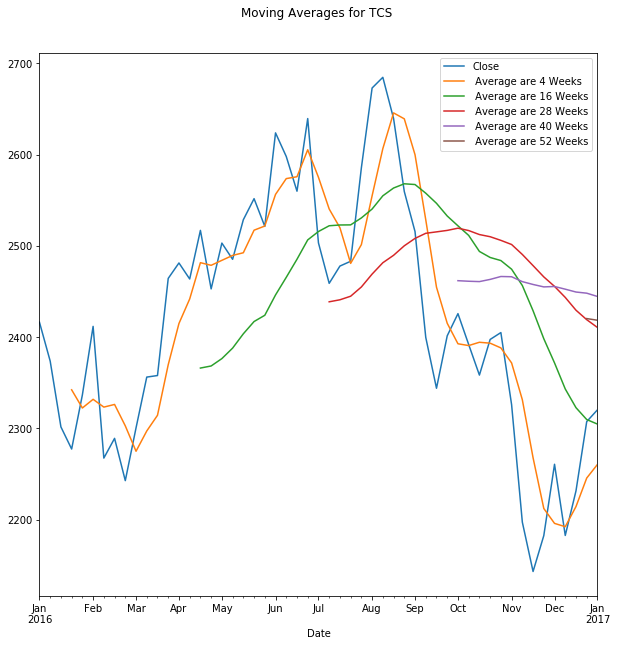

In [15]:
time_series(TCS)

Calculated Moving Averages are: for 4 weeks: 

 Date
2016-01-03    1105.250000
2016-01-10    1067.280000
2016-01-17    1092.390000
2016-01-24    1133.220000
2016-01-31    1142.662500
2016-02-07    1172.210000
2016-02-14    1106.060000
2016-02-21    1103.880000
2016-02-28    1121.470000
2016-03-06    1141.090000
2016-03-13    1156.862500
2016-03-20    1156.640000
2016-03-27    1197.550000
2016-04-03    1206.370000
2016-04-10    1202.290000
2016-04-17    1179.600000
2016-04-24    1229.962500
2016-05-01    1221.080000
2016-05-08    1188.330000
2016-05-15    1206.190000
2016-05-22    1209.290000
2016-05-29    1213.210000
2016-06-05    1260.580000
2016-06-12    1225.670000
2016-06-19    1182.270000
2016-06-26    1204.100000
2016-07-03    1169.080000
2016-07-10    1168.712500
2016-07-17    1158.840000
2016-07-24    1080.870000
2016-07-31    1081.250000
2016-08-07    1078.750000
2016-08-14    1076.870000
2016-08-21    1032.450000
2016-08-28    1033.780000
2016-09-04    1033.690000
2016-09-11 

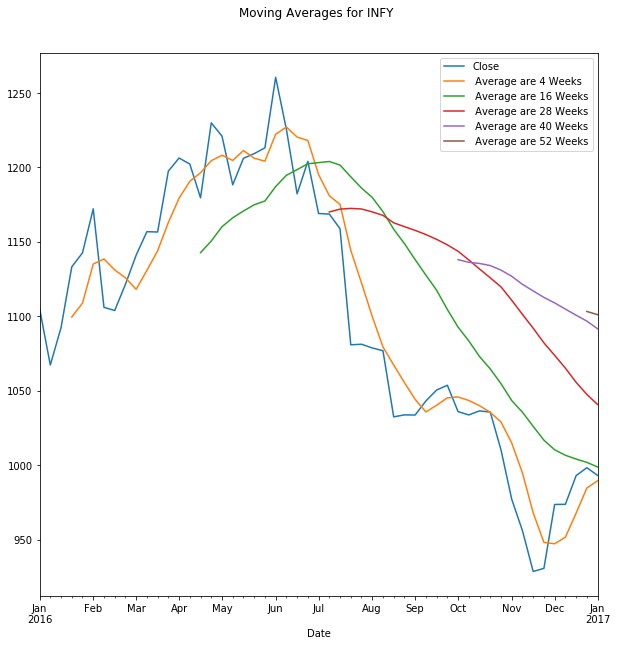

In [16]:
time_series(INFY)

Calculated Moving Averages are: for 4 weeks: 

 Date
2016-01-03    11174.850000
2016-01-10    10979.460000
2016-01-17    10885.900000
2016-01-24    10959.800000
2016-01-31    11073.325000
2016-02-07    11222.160000
2016-02-14    10570.710000
2016-02-21    10577.200000
2016-02-28    10531.390000
2016-03-06    10769.730000
2016-03-13    10875.587500
2016-03-20    10896.740000
2016-03-27    11209.533333
2016-04-03    11208.380000
2016-04-10    11210.270000
2016-04-17    11315.883333
2016-04-24    11452.362500
2016-05-01    11333.840000
2016-05-08    10970.570000
2016-05-15    11019.620000
2016-05-22    11092.730000
2016-05-29    11167.640000
2016-06-05    11471.690000
2016-06-12    11341.510000
2016-06-19    11235.620000
2016-06-26    11435.210000
2016-07-03    11033.730000
2016-07-10    11053.637500
2016-07-17    11021.050000
2016-07-24    10758.870000
2016-07-31    10905.190000
2016-08-07    11156.990000
2016-08-14    11193.340000
2016-08-21    10828.350000
2016-08-28    10667.070000
20

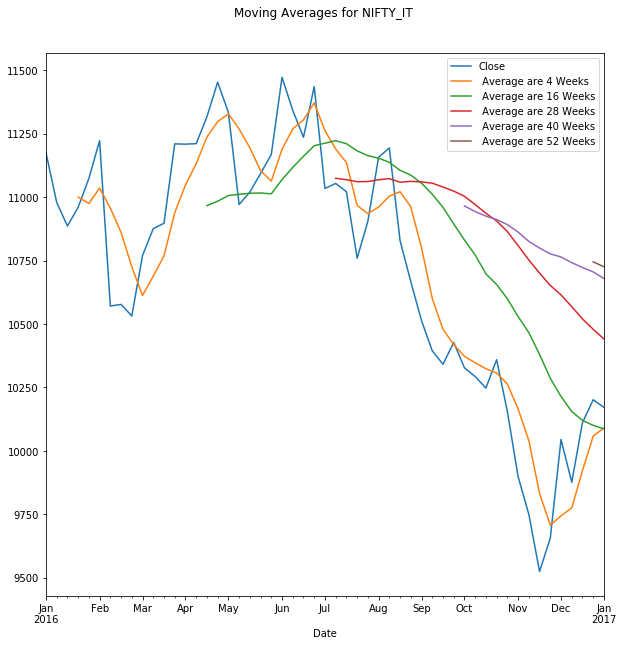

In [17]:
time_series(NIFTY)

In [0]:
TCS = TCS.asfreq( 'D', method = 'pad')
INFY = INFY.asfreq('D', method = 'pad')
NIFTY = NIFTY.asfreq('D', method = 'pad')

TCS.name = 'TCS'
INFY.name = 'INFY'
NIFTY.name = 'NIFTY'

In [0]:
def roll_win(stock, windows = [10, 75]):
  window = pd.DataFrame()
  window['Close'] = stock['Close']
  for x in range(len(windows)):
    series = window['Close'].rolling(windows[x]).mean()
    window[" Average are " + str(windows[x])+ " Weeks"] = series
    print('Calculated Moving Averages are: for {0} weeks: \n\n{1}' .format(windows[x], window['Close']))
  window.plot(title="Moving Averages for{}\n\n".format(stock.name))

Calculated Moving Averages are: for 10 weeks: 

Date
2016-01-01    2416.40
2016-01-02    2416.40
2016-01-03    2416.40
2016-01-04    2369.60
2016-01-05    2348.95
2016-01-06    2381.60
2016-01-07    2371.25
2016-01-08    2397.60
2016-01-09    2397.60
2016-01-10    2397.60
2016-01-11    2362.35
2016-01-12    2327.05
2016-01-13    2279.20
2016-01-14    2278.80
2016-01-15    2261.10
2016-01-16    2261.10
2016-01-17    2261.10
2016-01-18    2277.65
2016-01-19    2279.30
2016-01-20    2280.10
2016-01-21    2254.50
2016-01-22    2295.75
2016-01-23    2295.75
2016-01-24    2295.75
2016-01-25    2304.65
2016-01-26    2304.65
2016-01-27    2319.75
2016-01-28    2331.20
2016-01-29    2391.30
2016-01-30    2391.30
               ...   
2016-11-30    2276.05
2016-12-01    2263.45
2016-12-02    2221.85
2016-12-03    2221.85
2016-12-04    2221.85
2016-12-05    2186.00
2016-12-06    2182.35
2016-12-07    2154.55
2016-12-08    2195.75
2016-12-09    2195.25
2016-12-10    2195.25
2016-12-11    2195.25
2

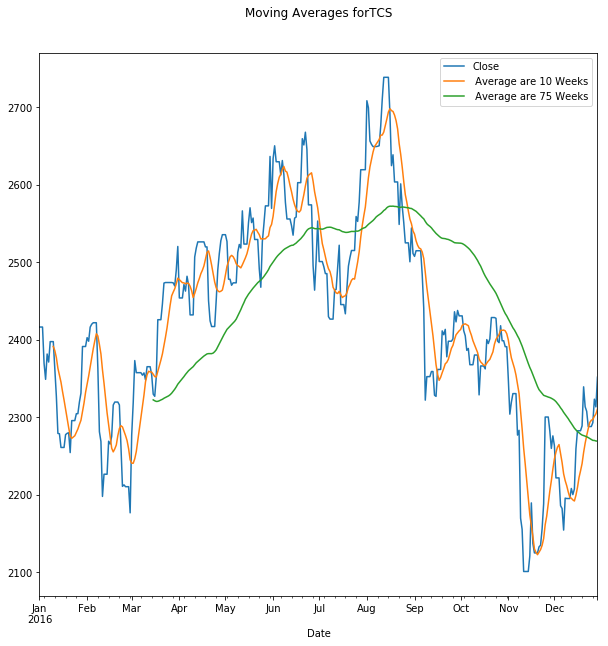

In [20]:
roll_win(TCS)

Calculated Moving Averages are: for 10 weeks: 

Date
2016-01-01    1105.25
2016-01-02    1105.25
2016-01-03    1105.25
2016-01-04    1078.90
2016-01-05    1074.05
2016-01-06    1069.35
2016-01-07    1050.80
2016-01-08    1063.30
2016-01-09    1063.30
2016-01-10    1063.30
2016-01-11    1055.70
2016-01-12    1049.95
2016-01-13    1083.40
2016-01-14    1133.00
2016-01-15    1139.90
2016-01-16    1139.90
2016-01-17    1139.90
2016-01-18    1131.90
2016-01-19    1139.65
2016-01-20    1121.25
2016-01-21    1137.05
2016-01-22    1136.25
2016-01-23    1136.25
2016-01-24    1136.25
2016-01-25    1137.65
2016-01-26    1137.65
2016-01-27    1138.50
2016-01-28    1129.60
2016-01-29    1164.90
2016-01-30    1164.90
               ...   
2016-11-30     975.55
2016-12-01     975.60
2016-12-02     964.50
2016-12-03     964.50
2016-12-04     964.50
2016-12-05     961.65
2016-12-06     966.50
2016-12-07     966.40
2016-12-08     984.65
2016-12-09     989.35
2016-12-10     989.35
2016-12-11     989.35
2

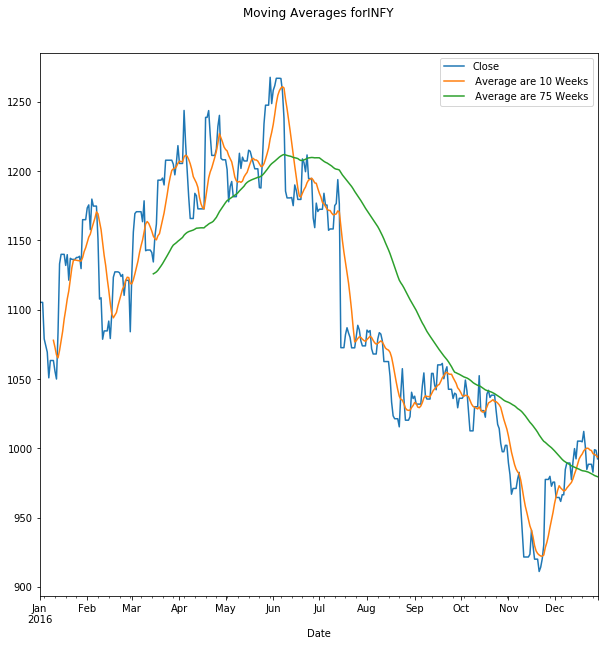

In [21]:
roll_win(INFY)

Calculated Moving Averages are: for 10 weeks: 

Date
2016-01-01    11174.85
2016-01-02    11174.85
2016-01-03    11174.85
2016-01-04    11029.25
2016-01-05    10997.15
2016-01-06    11018.15
2016-01-07    10863.20
2016-01-08    10989.55
2016-01-09    10989.55
2016-01-10    10989.55
2016-01-11    10823.90
2016-01-12    10790.35
2016-01-13    10839.85
2016-01-14    10980.45
2016-01-15    10994.95
2016-01-16    10994.95
2016-01-17    10994.95
2016-01-18    10984.00
2016-01-19    10963.10
2016-01-20    10910.50
2016-01-21    10934.70
2016-01-22    11006.70
2016-01-23    11006.70
2016-01-24    11006.70
2016-01-25    11025.35
2016-01-26    11025.35
2016-01-27    11029.10
2016-01-28    11002.70
2016-01-29    11236.15
2016-01-30    11236.15
                ...   
2016-11-30    10087.65
2016-12-01    10049.75
2016-12-02     9922.75
2016-12-03     9922.75
2016-12-04     9922.75
2016-12-05     9836.00
2016-12-06     9834.95
2016-12-07     9777.90
2016-12-08     9935.90
2016-12-09     9997.50
2016

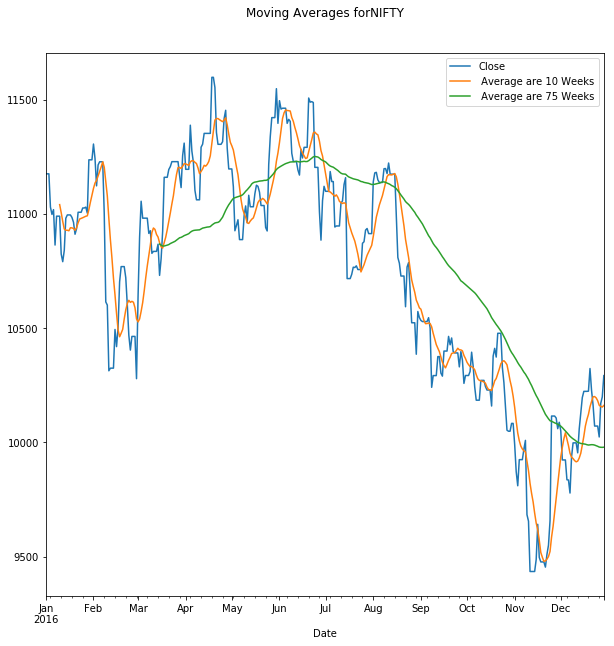

In [22]:
roll_win(NIFTY)

In [0]:
def volume_shocks(stock):
  stock["vol_t+1"] = stock.Volume.shift(1)
  stock["volume_shock"] = ((abs(stock["vol_t+1"] - stock["Volume"])/stock["Volume"]*100)  > 10).astype(int)
  return stock

In [24]:
volume_shocks(TCS)
volume_shocks(INFY)
volume_shocks(NIFTY)

,Date,Open,High,Low,Close,Volume,Turnover,vol_t+1,volume_shock
Date,,,,,,,,,
2016-01-01,2016-01-01,11210.25,11221.60,11137.85,11174.85,3126850,3.190300e+09,NaN,0
2016-01-02,2016-01-01,11210.25,11221.60,11137.85,11174.85,3126850,3.190300e+09,3126850.0,0
2016-01-03,2016-01-01,11210.25,11221.60,11137.85,11174.85,3126850,3.190300e+09,3126850.0,0
2016-01-04,2016-01-04,11144.00,11160.95,11004.65,11029.25,7875357,7.677800e+09,3126850.0,1
2016-01-05,2016-01-05,11082.60,11084.60,10945.20,10997.15,7909892,8.598800e+09,7875357.0,0
2016-01-06,2016-01-06,11027.55,11037.40,10979.45,11018.15,8585557,9.187500e+09,7909892.0,0
2016-01-07,2016-01-07,10947.75,10964.65,10822.70,10863.20,10454519,1.066610e+10,8585557.0,1
2016-01-08,2016-01-08,10933.30,11007.50,10896.45,10989.55,7287266,7.345900e+09,10454519.0,1
2016-01-09,2016-01-08,10933.30,11007.50,10896.45,10989.55,7287266,7.345900e+09,7287266.0,0


In [0]:
def direction(stock):
  if stock["volume_shock"] == 0:
    pass
  else:
    if(stock["vol_t+1"] - stock["Volume"]) < 0:
      return 0
    else:
      return 1

In [0]:
def shock_direction(stock):
  stock['SHOCK_DIR'] = 'Nan'
  stock['SHOCK_DIR'] = stock.apply(direction, axis = 1)
  return stock

In [27]:
shock_direction(TCS)
shock_direction(INFY)
shock_direction(NIFTY)

,Date,Open,High,Low,Close,Volume,Turnover,vol_t+1,volume_shock,SHOCK_DIR
Date,,,,,,,,,,
2016-01-01,2016-01-01,11210.25,11221.60,11137.85,11174.85,3126850,3.190300e+09,NaN,0,NaN
2016-01-02,2016-01-01,11210.25,11221.60,11137.85,11174.85,3126850,3.190300e+09,3126850.0,0,NaN
2016-01-03,2016-01-01,11210.25,11221.60,11137.85,11174.85,3126850,3.190300e+09,3126850.0,0,NaN
2016-01-04,2016-01-04,11144.00,11160.95,11004.65,11029.25,7875357,7.677800e+09,3126850.0,1,0.0
2016-01-05,2016-01-05,11082.60,11084.60,10945.20,10997.15,7909892,8.598800e+09,7875357.0,0,NaN
2016-01-06,2016-01-06,11027.55,11037.40,10979.45,11018.15,8585557,9.187500e+09,7909892.0,0,NaN
2016-01-07,2016-01-07,10947.75,10964.65,10822.70,10863.20,10454519,1.066610e+10,8585557.0,1,0.0
2016-01-08,2016-01-08,10933.30,11007.50,10896.45,10989.55,7287266,7.345900e+09,10454519.0,1,1.0
2016-01-09,2016-01-08,10933.30,11007.50,10896.45,10989.55,7287266,7.345900e+09,7287266.0,0,NaN


In [0]:
def price_shock(stock):
  stock["price_t+1"] = stock.Close.shift(1)
  stock["price_shock"] = ((abs(stock["price_t+1"] - stock["Close"])/stock["Close"]*100) > 2).astype(int)
  stock["price_black_swan"] = stock['price_shock']
  return stock

In [29]:
price_shock(TCS)
price_shock(INFY)
price_shock(NIFTY)

,Date,Open,High,Low,Close,Volume,Turnover,vol_t+1,volume_shock,SHOCK_DIR,price_t+1,price_shock,price_black_swan
Date,,,,,,,,,,,,,
2016-01-01,2016-01-01,11210.25,11221.60,11137.85,11174.85,3126850,3.190300e+09,NaN,0,NaN,NaN,0,0
2016-01-02,2016-01-01,11210.25,11221.60,11137.85,11174.85,3126850,3.190300e+09,3126850.0,0,NaN,11174.85,0,0
2016-01-03,2016-01-01,11210.25,11221.60,11137.85,11174.85,3126850,3.190300e+09,3126850.0,0,NaN,11174.85,0,0
2016-01-04,2016-01-04,11144.00,11160.95,11004.65,11029.25,7875357,7.677800e+09,3126850.0,1,0.0,11174.85,0,0
2016-01-05,2016-01-05,11082.60,11084.60,10945.20,10997.15,7909892,8.598800e+09,7875357.0,0,NaN,11029.25,0,0
2016-01-06,2016-01-06,11027.55,11037.40,10979.45,11018.15,8585557,9.187500e+09,7909892.0,0,NaN,10997.15,0,0
2016-01-07,2016-01-07,10947.75,10964.65,10822.70,10863.20,10454519,1.066610e+10,8585557.0,1,0.0,11018.15,0,0
2016-01-08,2016-01-08,10933.30,11007.50,10896.45,10989.55,7287266,7.345900e+09,10454519.0,1,1.0,10863.20,0,0
2016-01-09,2016-01-08,10933.30,11007.50,10896.45,10989.55,7287266,7.345900e+09,7287266.0,0,NaN,10989.55,0,0


In [0]:
def price_shock_without_volume_shock(stock):
  stock["not_vol_shock"] = (~(stock["volume_shock"].astype(bool))).astype(int)
  stock["price_shock_without_volume_shock"] = stock["not_vol_shock"] & stock["price_shock"]
  return stock

In [31]:
price_shock_without_volume_shock(TCS)
price_shock_without_volume_shock(INFY)
price_shock_without_volume_shock(NIFTY)

,Date,Open,High,Low,Close,Volume,Turnover,vol_t+1,volume_shock,SHOCK_DIR,price_t+1,price_shock,price_black_swan,not_vol_shock,price_shock_without_volume_shock
Date,,,,,,,,,,,,,,,
2016-01-01,2016-01-01,11210.25,11221.60,11137.85,11174.85,3126850,3.190300e+09,NaN,0,NaN,NaN,0,0,1,0
2016-01-02,2016-01-01,11210.25,11221.60,11137.85,11174.85,3126850,3.190300e+09,3126850.0,0,NaN,11174.85,0,0,1,0
2016-01-03,2016-01-01,11210.25,11221.60,11137.85,11174.85,3126850,3.190300e+09,3126850.0,0,NaN,11174.85,0,0,1,0
2016-01-04,2016-01-04,11144.00,11160.95,11004.65,11029.25,7875357,7.677800e+09,3126850.0,1,0.0,11174.85,0,0,0,0
2016-01-05,2016-01-05,11082.60,11084.60,10945.20,10997.15,7909892,8.598800e+09,7875357.0,0,NaN,11029.25,0,0,1,0
2016-01-06,2016-01-06,11027.55,11037.40,10979.45,11018.15,8585557,9.187500e+09,7909892.0,0,NaN,10997.15,0,0,1,0
2016-01-07,2016-01-07,10947.75,10964.65,10822.70,10863.20,10454519,1.066610e+10,8585557.0,1,0.0,11018.15,0,0,0,0
2016-01-08,2016-01-08,10933.30,11007.50,10896.45,10989.55,7287266,7.345900e+09,10454519.0,1,1.0,10863.20,0,0,0,0
2016-01-09,2016-01-08,10933.30,11007.50,10896.45,10989.55,7287266,7.345900e+09,7287266.0,0,NaN,10989.55,0,0,1,0


In [0]:
import bokeh
from bokeh.plotting import figure, output_file, show
from bokeh.io import show, output_notebook
from bokeh.palettes import Blues9
from bokeh.palettes import RdBu3
from bokeh.models import ColumnDataSource, CategoricalColorMapper, ContinuousColorMapper
from bokeh.palettes import Spectral11

In [33]:
output_notebook()

Loading BokehJS ...

In [0]:
def bokeh_plot(stock):
  data = dict(stock=stock['Close'], Date=stock.index)
  load = figure(plot_width=800, plot_height=250,  title = 'time series for {}' .format(stock.name), x_axis_type="datetime")
  load.line(stock.index, stock['Close'], color='red', alpha=0.3)
  load.circle(stock.index, stock.Close*stock["price_shock_without_volume_shock"], size=4, legend='Price Shock Without Volume Shock')
  show(load)

In [0]:
#output_file("ariam.html")

In [36]:
bokeh_plot(TCS)

In [37]:
bokeh_plot(INFY)
bokeh_plot(NIFTY)

In [0]:
from statsmodels.tsa.stattools import acf, pacf
def draw_pack(stock):
  lags = 50
  x = list(range(lags))
  y = figure(plot_height = 500, title = "Partial Autocorrelation Plot {} ".format(stock.name))
  partial_autocorr = pacf(stock["Close"], nlags = lags)
  y.vbar(x=x, top=partial_autocorr, width=0.9)
  show(y)


In [40]:
draw_pack(TCS)
draw_pack(INFY)
draw_pack(NIFTY)

In [0]:
#output_file("root.html")

**Time series forecasting with Arima**
#**Modelling**
We are going to apply one of the most commonly used method for time-series forecasting, known as ARIMA, which stands for Autoregressive Integrated Moving Average.

ARIMA models are denoted with the notation ARIMA(p, d, q). These three parameters account for seasonality, trend, and noise in data:

In [0]:
import itertools

In [47]:
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)
